In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def download_data(ticker, start_date, end_date):
    # Download data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Save data to a CSV file
    filename = ticker + '.csv'
    data.to_csv(filename)

In [3]:
def load_ticker(ticker):
    df = pd.read_csv(f"{ticker}.csv")
    df['Returns'] = df['Close'].pct_change()
    return df

In [4]:
ticker = 'AAPL'
start = '2010-01-01'
end = '2022-01-01'
download_data(ticker, start, end)
df = load_ticker(ticker)

[*********************100%***********************]  1 of 1 completed


Date   Returns
0     2010-01-04       NaN
1     2010-01-05  0.001729
2     2010-01-06 -0.015906
3     2010-01-07 -0.001849
4     2010-01-08  0.006648
...          ...       ...
3016  2021-12-27  0.022975
3017  2021-12-28 -0.005767
3018  2021-12-29  0.000502
3019  2021-12-30 -0.006578
3020  2021-12-31 -0.003535

In [5]:
df['Tomorrow_Returns'] = df['Returns'].shift(-1)
df.dropna(inplace=True)

In [6]:
X_train = df['Returns'].iloc[:-1]
y = df['Tomorrow_Returns'].iloc[:-1]
X_test = df[['Returns']].iloc[-10:]
X_test['Actual_Returns'] = df['Tomorrow_Returns'].iloc[-10:]

In [ ]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y)
y_pred = lr.predict(X_test[['Returns']])

In [ ]:
mse = mean_squared_error(X_test['Actual_Returns'], y_pred)
rmse = np.sqrt(mse)

RMSE: 0.01154

In [ ]:
plt.figure(figsize=(14, 7))
sns.regplot(x=X_test['Returns'], y=X_test['Actual_Returns'], line_kws={'color': 'blue'})
sns.regplot(x=X_test['Returns'], y=y_pred, line_kws={'color': 'red'})
plt.title(f'Apple Stock Price Prediction\nRMSE: {rmse}')
plt.xlabel("Today's Returns")
plt.ylabel("Tomorrow's Returns")
plt.legend(['Actual Returns', 'Predicted Returns'])
plt.show()

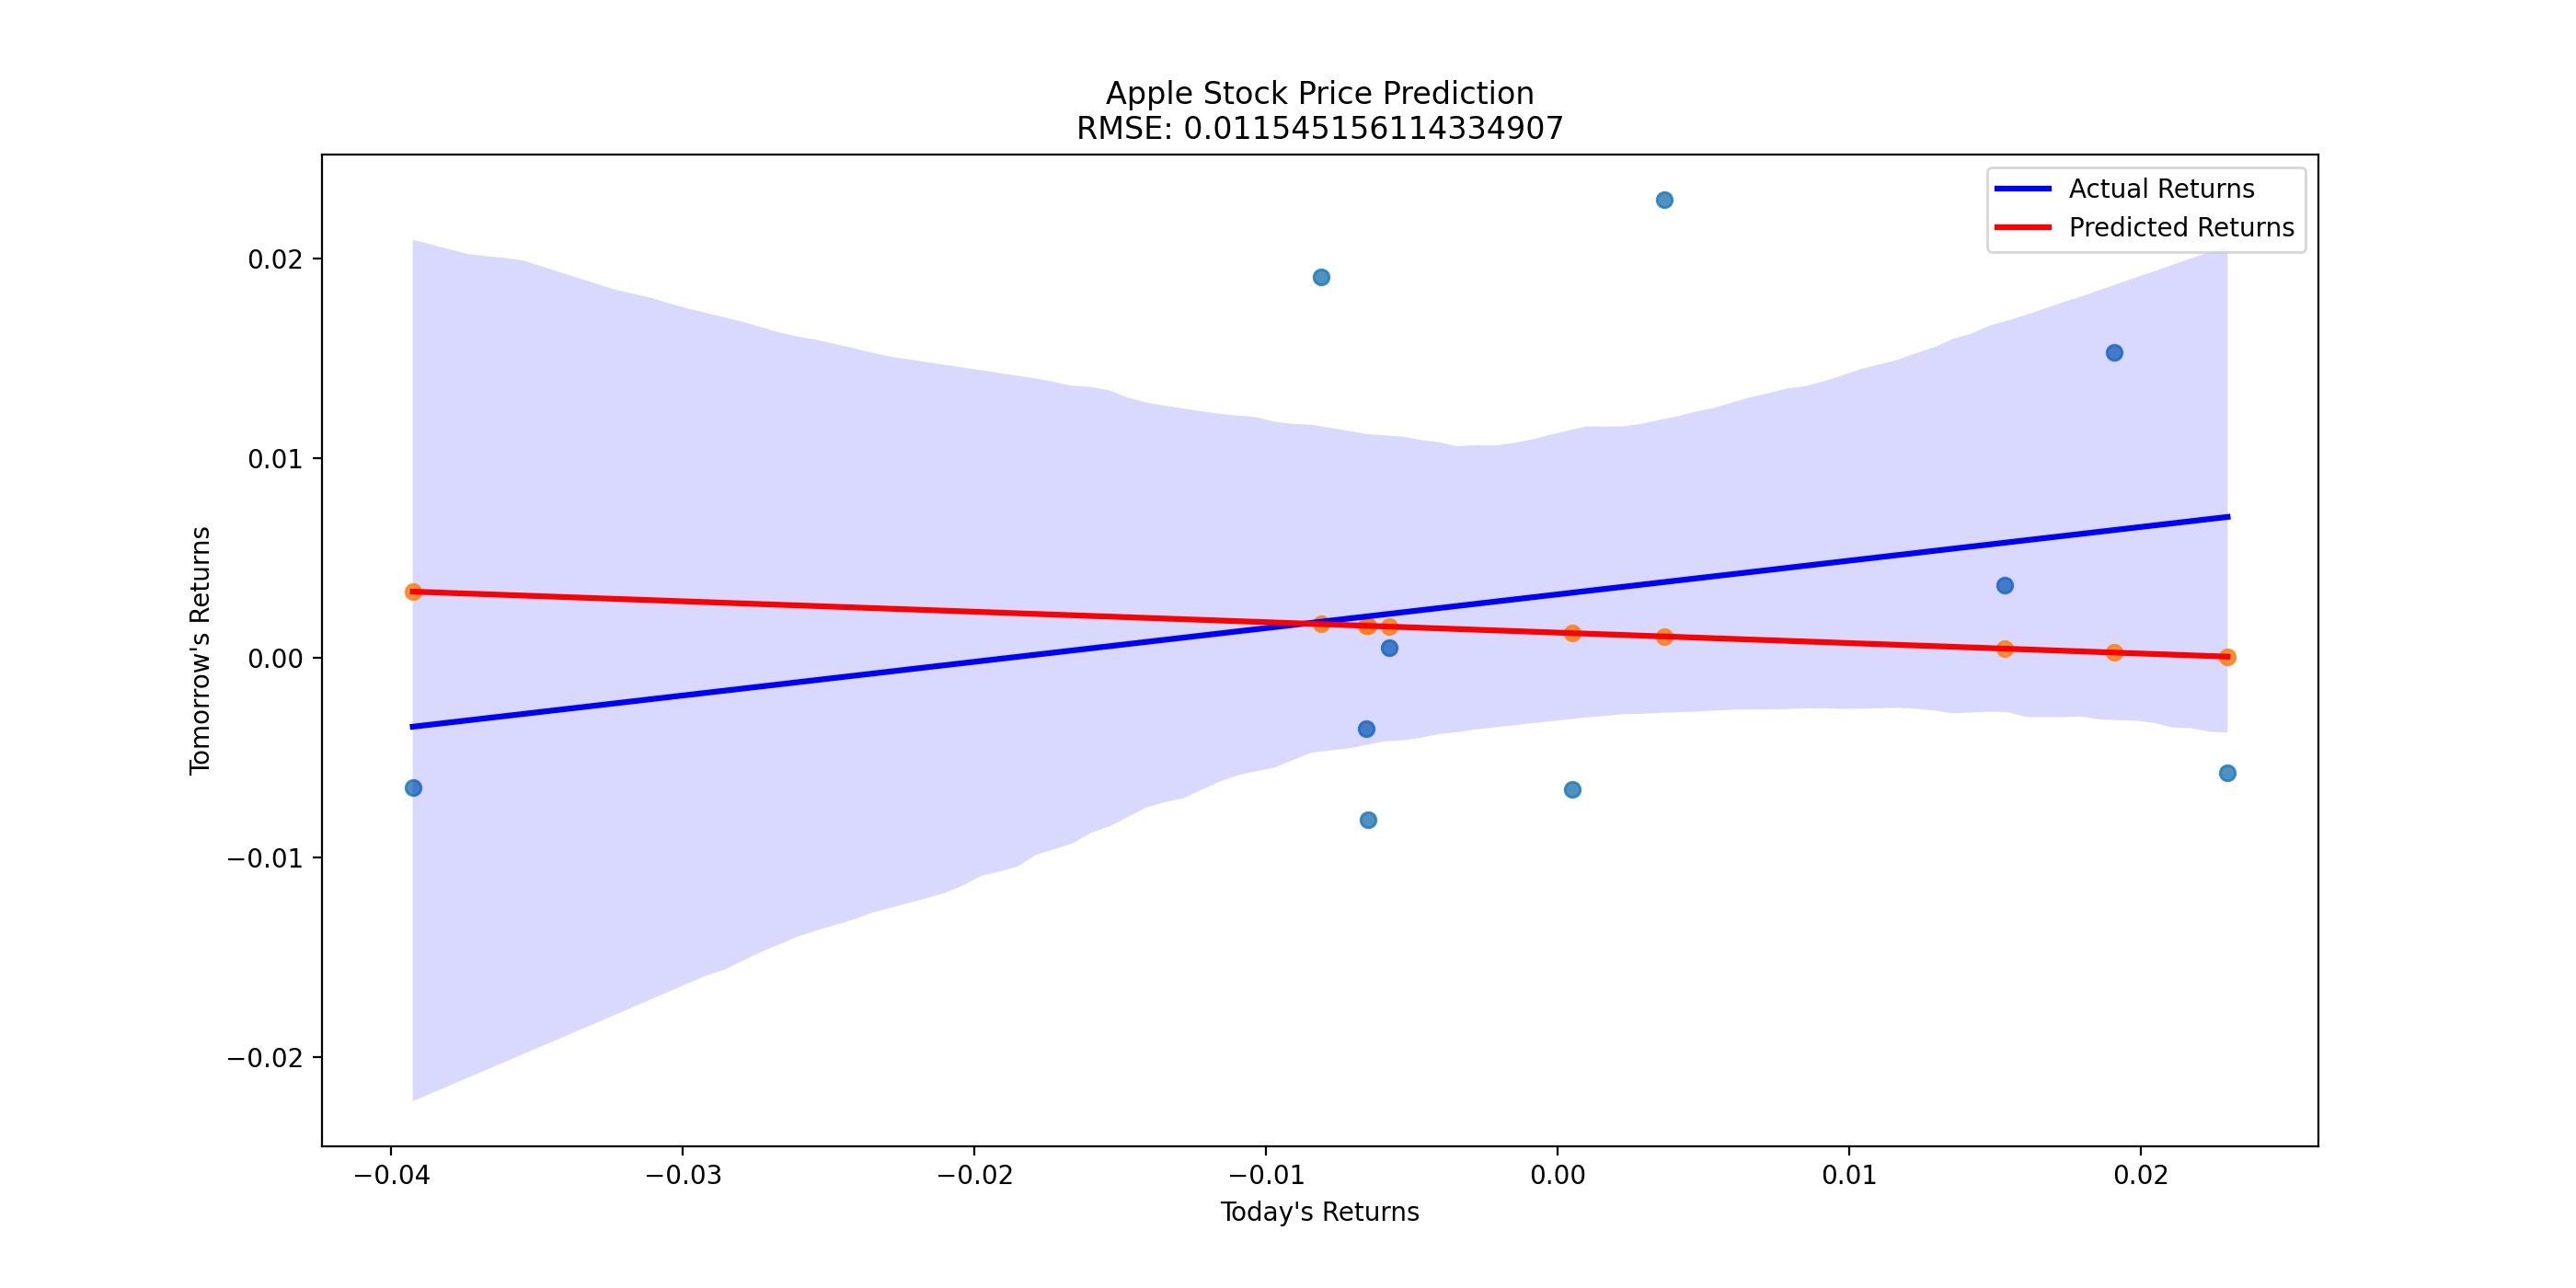

In [ ]:
plt.figure(figsize=(14, 7))
y_pred_series = pd.Series(y_pred, index=X_test.index)
sns.lineplot(data=X_test[['Actual_Returns'][::5]], palette=['red'])
sns.lineplot(data=y_pred_series, color='blue')
plt.title(f'Apple Stock Price Prediction\nRMSE: {rmse}')
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend(['Actual Returns', 'Predicted Returns'])
plt.xlim(start, end)
plt.show()

Time series representation of predicted returns vs actual returns